In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import glob, os

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
sns.set(rc={'figure.figsize':(10,5)})

In [5]:
path = 'yelp_data/sent_text.csv'

original = pd.read_csv(path)
original.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
def maxval(row):
    if row['pos']> row['neg']:
        return 'positive'
    elif row['pos']<  row['neg']:
        return 'negative'
    else:
        return 'undecided'

In [7]:
original['max_value_sent'] = original.apply(maxval,axis=1)

In [8]:
original.head()

,review_id,stars,text,compound,neg,neu,pos,max_value_sent
0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,-0.067,0.154,0.730,0.116,negative
1,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,-0.022,0.081,0.773,0.146,positive
2,BmNDRCV9_NzQ_KCChyfdEw,4,Dr. Byrne is a great doctor! She has great bed...,0.335,0.060,0.705,0.235,positive
3,t_TKVMxKFYm9Hl-TIO7UUw,3,I'm raising my review as Dr Bryne's has been m...,0.108,0.072,0.852,0.076,positive
4,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,-0.139,0.128,0.791,0.082,negative


In [9]:
def valscore(comp):
    if comp >= 0.05:
        return 'positive'
    elif comp <= -0.05:
        return 'negative'
    elif comp >-0.05 and comp <0.05:
        return 'neutral'
    else:
        return 'unknown'

In [10]:
%%time
original['sentiment_value'] = original['compound'].apply(valscore)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 21.5 ms


In [11]:
original.head()

,review_id,stars,text,compound,neg,neu,pos,max_value_sent,sentiment_value
0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,-0.067,0.154,0.730,0.116,negative,negative
1,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,-0.022,0.081,0.773,0.146,positive,neutral
2,BmNDRCV9_NzQ_KCChyfdEw,4,Dr. Byrne is a great doctor! She has great bed...,0.335,0.060,0.705,0.235,positive,positive
3,t_TKVMxKFYm9Hl-TIO7UUw,3,I'm raising my review as Dr Bryne's has been m...,0.108,0.072,0.852,0.076,positive,positive
4,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,-0.139,0.128,0.791,0.082,negative,negative


In [12]:
original.max_value_sent.value_counts()

positive     44661
negative     18785
undecided      560
Name: max_value_sent, dtype: int64

In [13]:
original.sentiment_value.value_counts()

positive    40742
negative    14478
neutral      8786
Name: sentiment_value, dtype: int64

In [14]:
original.head()

,review_id,stars,text,compound,neg,neu,pos,max_value_sent,sentiment_value
0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,-0.067,0.154,0.730,0.116,negative,negative
1,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,-0.022,0.081,0.773,0.146,positive,neutral
2,BmNDRCV9_NzQ_KCChyfdEw,4,Dr. Byrne is a great doctor! She has great bed...,0.335,0.060,0.705,0.235,positive,positive
3,t_TKVMxKFYm9Hl-TIO7UUw,3,I'm raising my review as Dr Bryne's has been m...,0.108,0.072,0.852,0.076,positive,positive
4,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,-0.139,0.128,0.791,0.082,negative,negative


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
# sns.set_context("paper")

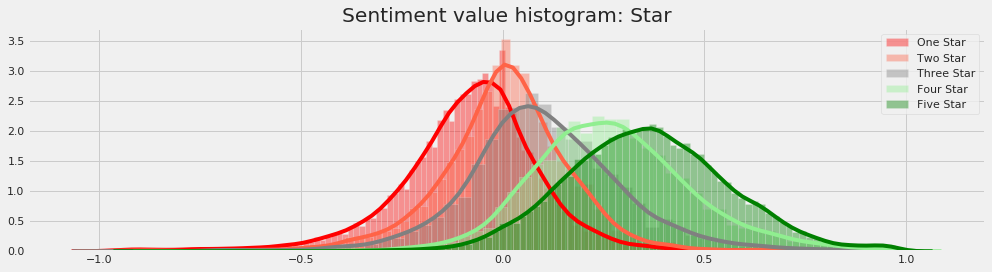

In [19]:
plt.figure(figsize=(14,4))
sns.distplot(original[original.stars==1]['compound'],bins='auto',label='One Star',color='red',hist=True)
sns.distplot(original[original.stars==2]['compound'],bins='auto',label='Two Star',color='tomato',hist=True)
sns.distplot(original[original.stars==3]['compound'],bins='auto',label='Three Star',color='gray',hist=True)
sns.distplot(original[original.stars==4]['compound'],bins='auto',label='Four Star',color='lightgreen',hist=True)
sns.distplot(original[original.stars==5]['compound'],bins='auto',label='Five Star',color='green',hist=True)
plt.xlabel('')
plt.legend()
plt.title('Sentiment value histogram: Star')
plt.show()

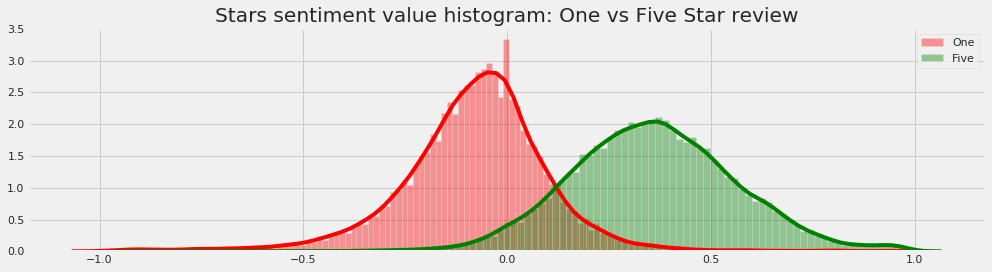

In [20]:
plt.figure(figsize=(14,4))
sns.distplot(original[original.stars==1]['compound'],bins='auto',label='One',color='red',hist=True)
#sns.distplot(original[original.stars==2]['compound'],bins='auto',label='Two',color='tomato',hist=True)
#sns.distplot(original[original.stars==3]['compound'],bins='auto',label='Three',color='gray',hist=True)
#sns.distplot(original[original.stars==4]['compound'],bins='auto',label='Four',color='lightgreen',hist=True)
sns.distplot(original[original.stars==5]['compound'],bins='auto',label='Five',color='green',hist=True)
plt.xlabel('')
plt.legend()
plt.title('Stars sentiment value histogram: One vs Five Star review')
plt.show()

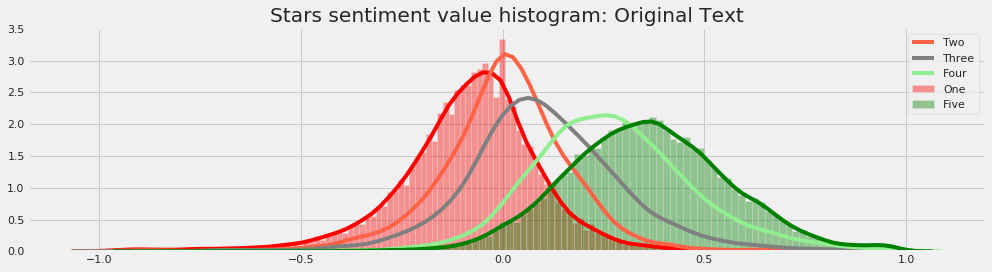

In [21]:
plt.figure(figsize=(14,4))
sns.distplot(original[original.stars==1]['compound'],bins='auto',label='One',color='red',hist=True)
sns.distplot(original[original.stars==2]['compound'],bins='auto',label='Two',color='tomato',hist=False)
sns.distplot(original[original.stars==3]['compound'],bins='auto',label='Three',color='gray',hist=False)
sns.distplot(original[original.stars==4]['compound'],bins='auto',label='Four',color='lightgreen',hist=False)
sns.distplot(original[original.stars==5]['compound'],bins='auto',label='Five',color='green',hist=True)
plt.xlabel('')
plt.legend()
plt.title('Stars sentiment value histogram: Original Text')
plt.show()

## Lets focous only on One & Five stars for simplification¶


In [22]:
og = original.ix[np.where((original.stars==1)|(original.stars==5))]
og = og.reset_index(drop=True)
og.head()

,review_id,stars,text,compound,neg,neu,pos,max_value_sent,sentiment_value
0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,-0.067,0.154,0.730,0.116,negative,negative
1,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,-0.022,0.081,0.773,0.146,positive,neutral
2,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,-0.139,0.128,0.791,0.082,negative,negative
3,jX47gPdL1ta_OTt5HgDSGQ,1,I went to the emergency room because i was hav...,-0.053,0.088,0.863,0.050,negative,negative
4,LSCLa-SIOgaOxP4r3VjX-A,5,Dr. Byrne is an excellent doctor with all the ...,0.071,0.092,0.781,0.126,positive,positive


In [23]:
og.stars.value_counts()

5    31726
1    21988
Name: stars, dtype: int64

In [24]:
og.max_value_sent.value_counts(dropna=False)

positive     37131
negative     16135
undecided      448
Name: max_value_sent, dtype: int64

In [25]:
og.sentiment_value.value_counts(dropna=False)

positive    34150
negative    12711
neutral      6853
Name: sentiment_value, dtype: int64

In [26]:
og.groupby('stars')['sentiment_value'].count()

stars
1    21988
5    31726
Name: sentiment_value, dtype: int64

In [27]:
og.head()

,review_id,stars,text,compound,neg,neu,pos,max_value_sent,sentiment_value
0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,-0.067,0.154,0.730,0.116,negative,negative
1,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,-0.022,0.081,0.773,0.146,positive,neutral
2,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,-0.139,0.128,0.791,0.082,negative,negative
3,jX47gPdL1ta_OTt5HgDSGQ,1,I went to the emergency room because i was hav...,-0.053,0.088,0.863,0.050,negative,negative
4,LSCLa-SIOgaOxP4r3VjX-A,5,Dr. Byrne is an excellent doctor with all the ...,0.071,0.092,0.781,0.126,positive,positive


## Plot

In [28]:
one_og = og[og.stars == 1]
five_og = og[og.stars == 5]

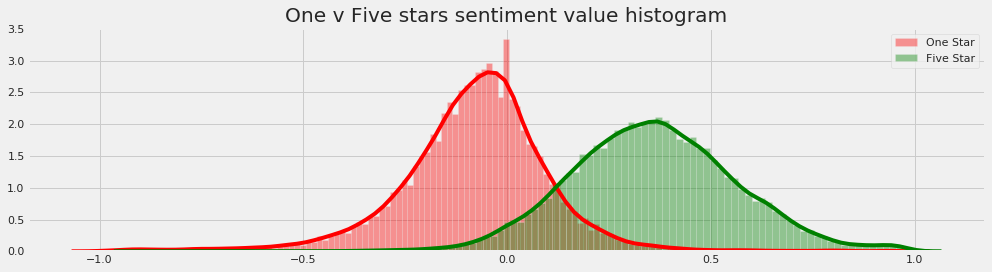

In [29]:
plt.figure(figsize=(14,4))
sns.distplot(one_og['compound'],bins='auto',label='One Star',color='red',hist=True)
sns.distplot(five_og['compound'],bins='auto',label='Five Star', color= 'green',hist=True)
plt.xlabel('')
plt.legend()
plt.title('One v Five stars sentiment value histogram')
plt.show()

# compare neg neutral positive values

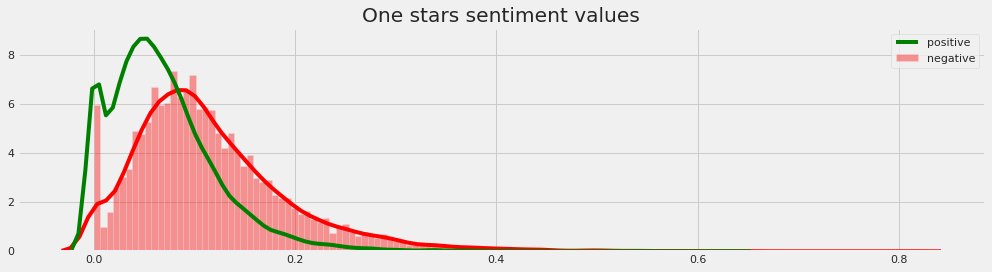

In [30]:
plt.figure(figsize=(14,4))
sns.distplot(one_og['neg'],bins='auto',label='negative',color='red',hist=True)
#sns.distplot(one_og['neu'],bins='auto',label='neutral', color= 'gray',hist=False)
sns.distplot(one_og['pos'],bins='auto',label='positive',color='green',hist=False)
plt.xlabel('')
plt.legend()
plt.title('One stars sentiment values')
plt.show()

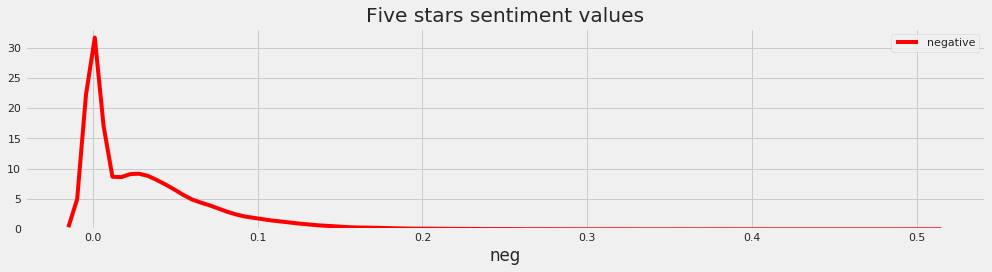

In [31]:
plt.figure(figsize=(14,4))
sns.distplot(five_og['neg'],bins='auto',label='negative',color='red',hist=False)
#sns.distplot(five_og['neu'],bins='auto',label='neutral', color= 'gray',hist=False)
#sns.distplot(five_og['pos'],bins='auto',label='positive',color='green',hist=True)
plt.legend()
plt.title('Five stars sentiment values')
plt.show()

In [32]:
ogg = original.ix[np.where((original.stars==1)|(original.stars==5))]
ogg = ogg.reset_index(drop=True)

In [33]:
ogg.head()

,review_id,stars,text,compound,neg,neu,pos,max_value_sent,sentiment_value
0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,-0.067,0.154,0.730,0.116,negative,negative
1,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,-0.022,0.081,0.773,0.146,positive,neutral
2,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,-0.139,0.128,0.791,0.082,negative,negative
3,jX47gPdL1ta_OTt5HgDSGQ,1,I went to the emergency room because i was hav...,-0.053,0.088,0.863,0.050,negative,negative
4,LSCLa-SIOgaOxP4r3VjX-A,5,Dr. Byrne is an excellent doctor with all the ...,0.071,0.092,0.781,0.126,positive,positive


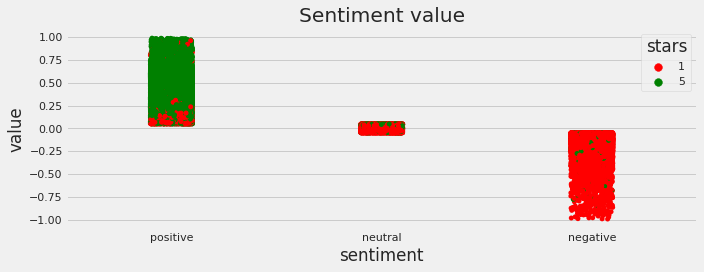

In [34]:
plt.figure(figsize=(10,4))

sp = sns.stripplot(x='sentiment_value', y="compound", 
                   order = ['positive','neutral','negative'],
                   palette={1: "red", 5: "green"},
                   hue='stars', data=ogg)
plt.xlabel('sentiment')
plt.ylabel('value')
plt.title('Sentiment value')
plt.show()

<Figure size 720x288 with 0 Axes>

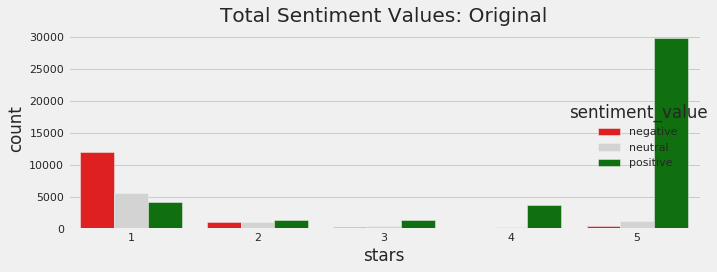

In [35]:
plt.figure(figsize=(10,4))
fc = sns.factorplot(x="stars", 
                    hue="sentiment_value", 
                    data=original, kind="count",size=4, aspect=2,
                    palette={"negative": "red", 
                             "positive": "green", 
                             "neutral": "lightgray"})
plt.title("Total Sentiment Values: Original")
plt.show()

In [36]:
ogg.stars.value_counts()

5    31726
1    21988
Name: stars, dtype: int64

<Figure size 720x288 with 0 Axes>

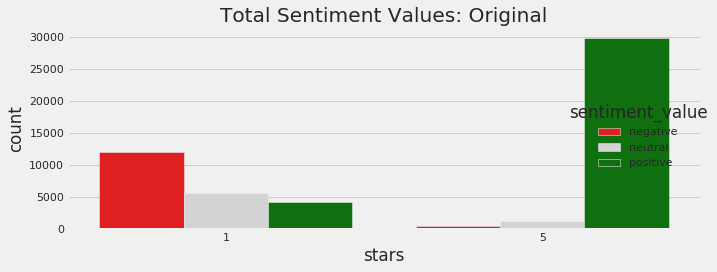

In [37]:
plt.figure(figsize=(10,4))
fc = sns.factorplot(x="stars", 
                    hue="sentiment_value", 
                    data=ogg, kind="count",size=4, aspect=2,
                    palette={"negative": "red", 
                             "positive": "green", 
                             "neutral": "lightgray"})
plt.title("Total Sentiment Values: Original")
plt.show()

In [ ]:
original.head()

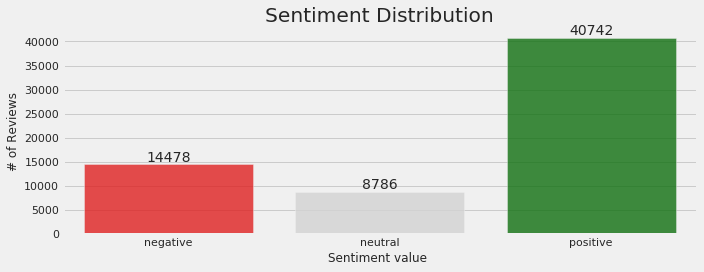

In [38]:
#Get the distribution of the ratings
x=original['sentiment_value'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(10,4))

ax= sns.barplot(x.index, x.values, alpha=0.8,
                                   palette={"negative": "red", 
                             "positive": "green", 
                             "neutral": "lightgray"})
plt.title("Sentiment Distribution")
plt.ylabel('# of Reviews', fontsize=12)
plt.xlabel('Sentiment value ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [39]:
original.to_csv('yelp_data/sent_text_final.csv')

In [40]:
clean.to_csv('yelp_data/sent_text_clean_final.csv')

NameError: name 'clean' is not defined

In [ ]:
ls yelp_data/

## Result


- clean text gives false results base on star value
- for sentiment value, keep original text